1.2083408591214482
100000.0
Turbulent
5.325865198883894


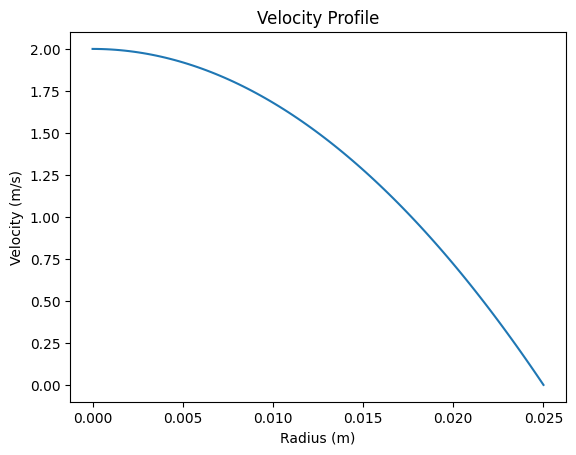

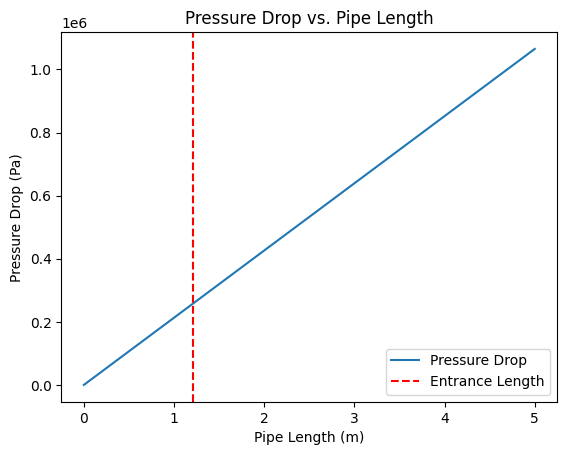

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Reynolds number
def calculate_reynolds_number(diameter, velocity, viscosity, density):
    return (velocity * diameter * density) / viscosity

# Function to check if flow is laminar or turbulent
def check_flow_regime(reynolds_number):
    return "Laminar" if reynolds_number < 2300 else "Turbulent"

# Function to calculate friction factor for laminar flow
def calculate_friction_factor_laminar(reynolds_number):
    return 64 / reynolds_number

# Function to calculate friction factor for turbulent flow using Colebrook-White equation
# roughness_ratio is taken as 0.002 for stainless steel

def calculate_friction_factor_turbulent(reynolds_number, roughness_ratio=0.008, tol=1e-5):
    # Initial guess for friction factor
    f_guess = 0.02

    while True:
        # Colebrook-White equation
        f = (-2 * np.log10((roughness_ratio / 3.7) + (2.51 / (reynolds_number * np.sqrt(f_guess)))))

        # Check convergence
        if abs(f - f_guess) < tol:
            break

        f_guess = f

    return f


# Function to calculate pressure drop using Darcy-Weisbach equation
def calculate_pressure_drop(flow_regime, friction_factor, length, diameter, density, velocity):
    if flow_regime == "Laminar":
        return (32 * friction_factor * length * density * velocity**2) / diameter
    else:
        return (friction_factor * length * density * velocity**2) / (2 * diameter)

# Function to calculate velocity profile
def calculate_velocity_profile(flow_regime, diameter, velocity, length):
    if flow_regime == "Laminar":
        r = np.linspace(0, diameter / 2, 100)
        velocity_profile = (2 * velocity * (1 - (r / (diameter / 2))**2))
    else:
        r = np.linspace(0, diameter / 2, 100)
        velocity_profile = velocity * (1 - (r / (diameter / 2))**2)

    return r, velocity_profile

# Function to calculate entrance length
def calculate_entrance_length(flow_regime, reynolds_number, diameter):
    if flow_regime == "Laminar":
        return 0.0575 * reynolds_number * diameter
    else:
        # Empirical correlation for turbulent entrance length
        return 1.359 * (reynolds_number)**0.25 * diameter

# Example input parameters
diameter = 0.05  # pipe diameter in meters
velocity = 2  # flow velocity in meters per second
density = 1000  # fluid density in kilograms per cubic meter
viscosity = 0.001  # fluid viscosity in kilograms per meter second
length = np.linspace(0, 5, 100)  # pipe length array in meters

# Initialize arrays for results
pressure_drop_array = np.zeros_like(length)

# Calculate Reynolds number
reynolds_number = calculate_reynolds_number(diameter, velocity, viscosity, density)

# Check flow regime
flow_regime = check_flow_regime(reynolds_number)

# Calculate friction factor
if flow_regime == "Laminar":
    friction_factor = calculate_friction_factor_laminar(reynolds_number)
else:
    friction_factor = calculate_friction_factor_turbulent(reynolds_number)

# Calculate entrance length
entrance_length = calculate_entrance_length(flow_regime, reynolds_number, diameter)

# Calculate velocity profile
radius, velocity_profile = calculate_velocity_profile(flow_regime, diameter, velocity, length[-1])


print(entrance_length)
print(reynolds_number)
print(flow_regime)
print(friction_factor)

# Plot velocity profile
plt.plot(radius, velocity_profile)
plt.title('Velocity Profile')
plt.xlabel('Radius (m)')
plt.ylabel('Velocity (m/s)')
plt.show()

# Loop through different lengths and calculate pressure drop
for i, pipe_length in enumerate(length):
    # Check if the flow is fully developed at the current length
    is_fully_developed = pipe_length >= entrance_length

    # Calculate pressure drop
    pressure_drop_array[i] = calculate_pressure_drop(flow_regime, friction_factor, pipe_length, diameter, density, velocity)

# Plot pressure drop vs. pipe length
plt.plot(length, pressure_drop_array, label='Pressure Drop')
plt.axvline(x=entrance_length, color='r', linestyle='--', label='Entrance Length')
plt.title('Pressure Drop vs. Pipe Length')
plt.xlabel('Pipe Length (m)')
plt.ylabel('Pressure Drop (Pa)')
plt.legend()
plt.show()
